# Função Massa de Probabilidade da soma (e diferença) de Variáveis Aleatórias Discretas Independentes
______________________
2017 Pedro Cruz up200506513@fc.up.pt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('ggplot')
np.random.seed(1)

## Um exemplo com duas VADs

### Método 1

Sejam $X_1$ e $X_2$ variáveis aleatórias discretas (VAD) independentes cujo espaço amostral é, respetivamente, $S_{X_1}=\left\{0,1,3,4,8,11\right\}$ e  $S_{X_2}=\left\{1,3,7,9\right\}$. As frequências absolutas registadas para cada acontecimento elementar de cada uma das VADs são, na mesma ordenação, $f_{X_1}  = \left\{15, 28, 48, 14, 3, 7\right\}$ e $f_{X_2} = \left\{12, 8, 28, 34\right\}$. Assim, as funções massa de probabilidade de cada VAD são dadas por:

In [2]:
# Variável Aleatória X1
S_X1  = np.array([[0., 1., 3., 4., 8., 11.]])     # Espaço amostral de X1
fr_X1 = np.array([[15., 28., 48., 14., 3., 7.]])  # Frequências absolutas de X1
P_X1  = fr_X1 / fr_X1.sum()                       # Frequências relativas de X1

# Variável Aleatória X2
S_X2  = np.array([[1., 3., 7., 9.]])        # Espaço amostral de X2
fr_X2 = np.array([[12., 8., 28., 34.]])     # Frequências absolutas de X2
P_X2  = fr_X2 / fr_X2.sum()                 # Frequências relativas de X2

print "P_X1 = ", P_X1
print "P_X2 = ", P_X2

P_X1 =  [[ 0.13043478  0.24347826  0.4173913   0.12173913  0.02608696  0.06086957]]
P_X2 =  [[ 0.14634146  0.09756098  0.34146341  0.41463415]]


Para calcular a função de probabilidade conjunta $F\left(\mathbf{W}\right)$ da VAD bidimensional $\mathbf{W}=(X_1=x, X_2=y)$ podemos fazer,

In [3]:
F_W = P_X2 * P_X1.T

print "F_W = ", F_W, "\n"
print "F_X1(y) = P_X1 = ", F_W.sum(axis=1)
print "F_X2(x) = P_X2 = ", F_W.sum(axis=0)
print "F_(X1=3, X2=9) = ", F_W[2,3]

F_W =  [[ 0.01908802  0.01272534  0.04453871  0.05408271]
 [ 0.03563097  0.02375398  0.08313892  0.1009544 ]
 [ 0.06108165  0.0407211   0.14252386  0.17306469]
 [ 0.01781548  0.01187699  0.04156946  0.0504772 ]
 [ 0.0038176   0.00254507  0.00890774  0.01081654]
 [ 0.00890774  0.00593849  0.02078473  0.0252386 ]] 

F_X1(y) = P_X1 =  [ 0.13043478  0.24347826  0.4173913   0.12173913  0.02608696  0.06086957]
F_X2(x) = P_X2 =  [ 0.14634146  0.09756098  0.34146341  0.41463415]
F_(X1=3, X2=9) =  0.173064687169


Ou seja,

\begin{array}{rr} \hline
& X_{2}=1 & X_{2}=3 & X_{2}=7 & X_{2}=9 & & F_{X_{1}}\left(x\right) \\ \hline
X_{1}=0 & 0.01908802 & 0.01272534 & 0.04453871 & 0.05408271 & & 0.13043478 \\ \hline
X_{1}=1 & 0.03563097 & 0.02375398 & 0.08313892 & 0.1009544 & & 0.24347826 \\ \hline
X_{1}=3 & 0.06108165 & 0.0407211 & 0.14252386 & 0.17306469 & & 0.4173913 \\ \hline
X_{1}=4 & 0.01781548 & 0.01187699 & 0.04156946 & 0.0504772 & & 0.12173913 \\ \hline
X_{1}=8 & 0.0038176 & 0.00254507 & 0.00890774 & 0.01081654 & & 0.02608696 \\ \hline
X_{1}=11 & 0.00890774 & 0.00593849 & 0.02078473 & 0.0252386 & & 0.06086957 \\ \hline
& & & & & & \\ \hline
F_{X_{2}}\left(y\right) & 0.14634146 & 0.09756098 & 0.34146341 & 0.41463415 & \\ \hline
\end{array}

Se a cada par ordenado $\mathbf{W}=(X_1=x, X_2=y)$ associarmos a soma $x+y$ teremos as somas para cada par dadas por,

In [4]:
somas = np.tile(S_X2,(len(S_X1[0]),1))  +  S_X1.T

print somas

[[  1.   3.   7.   9.]
 [  2.   4.   8.  10.]
 [  4.   6.  10.  12.]
 [  5.   7.  11.  13.]
 [  9.  11.  15.  17.]
 [ 12.  14.  18.  20.]]


Portanto, considerando uma nova variável $Z = X_1 + X_2$, temos o espaço amostral $S_Z= \left\{1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20\right\}$ e a função de probabilidade associada, na mesma ordem, é dada por:

In [5]:
S_Z = np.unique(somas)

P_Z = np.array([F_W[somas == i].sum() for i in S_Z])

print "S_Z = ", S_Z, "\n"
print "P_Z = ", P_Z

S_Z =  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  17.  18.  20.] 

P_Z =  [ 0.01908802  0.03563097  0.01272534  0.08483563  0.01781548  0.0407211
  0.05641569  0.08313892  0.05790032  0.24347826  0.04411453  0.18197243
  0.0504772   0.00593849  0.00890774  0.01081654  0.02078473  0.0252386 ]


### Método 2

Podemos obter $P_Z$ de forma mais direta fazendo a convolução de $P_{X_1}$ com $P_{X_2}$, tendo o cuidado de introduzir os vetores das funções de probabilidade de cada VAD $X_i$ com todos os valores de probabilidade definidos nos inteiros entre $\left[min\left(S_{X_i}\right), max\left(S_{X_i}\right)\right]$

$$P\left(Z=z\right)=\sum_{k=-\infty}^{\infty}P_{X_{1}}\left(X_{1}=k\right)P_{X_{2}}\left(X_{2}=z-k\right)$$

https://en.wikipedia.org/wiki/Convolution_of_probability_distributions

In [6]:
# Espaços amostrais de X1, X2, e Z=X1+X2
S_X1b = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11.])
S_X2b = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9.])
S_Zb = np.arange(S_X1b.min() + S_X2b.min(), S_X1b.max() + S_X2b.max() + 1)

# Funções de massa de probabilidade
P_X1b = np.array([0.13043478, 0.24347826, 0., 0.4173913, 0.12173913, 0., 0., 0., 0.02608696, 0., 0., 0.06086957])
P_X2b = np.array([0.14634146, 0., 0.09756098, 0., 0., 0., 0.34146341, 0., 0.41463415])
P_Zb = np.convolve(P_X1b, P_X2b, mode="full")

# Coluna 0: valor de Z ; Coluna 1: probabilidade correspondente
par_Z_PZ = np.hstack([S_Zb.reshape((len(S_Zb),1)), P_Zb.reshape((len(P_Zb)),1)])

print par_Z_PZ

[[  1.00000000e+00   1.90880161e-02]
 [  2.00000000e+00   3.56309640e-02]
 [  3.00000000e+00   1.27253450e-02]
 [  4.00000000e+00   8.48356299e-02]
 [  5.00000000e+00   1.78154820e-02]
 [  6.00000000e+00   4.07211043e-02]
 [  7.00000000e+00   5.64156936e-02]
 [  8.00000000e+00   8.31389169e-02]
 [  9.00000000e+00   5.79003179e-02]
 [  1.00000000e+01   2.43478258e-01]
 [  1.10000000e+01   4.41145278e-02]
 [  1.20000000e+01   1.81972429e-01]
 [  1.30000000e+01   5.04772007e-02]
 [  1.40000000e+01   5.93849490e-03]
 [  1.50000000e+01   8.90774232e-03]
 [  1.60000000e+01   0.00000000e+00]
 [  1.70000000e+01   1.08165445e-02]
 [  1.80000000e+01   2.07847309e-02]
 [  1.90000000e+01   0.00000000e+00]
 [  2.00000000e+01   2.52386024e-02]]


## Casos gerais

No módulo **somaVADs.py** encontram-se as funções aqui apresentadas. Começamos pelas funções **somaVADs_matrix** e **somaVADs_conv** relativas ao método 1 e 2, respetivamente, generalizadas para o caso geral da soma de *n* VADs independentes.

In [7]:
from fmp_soma_vadis import somaVADs_biv, somaVADs_conv

### Exemplo 1 - Soma de duas VADs

Usam-se novamente as mesmas VADs já usadas acima para exemplificar a utilização dos métodos e confirmar a obtenção dos mesmos resultados.

In [8]:
# Construção dos elementos X_i, FMP_i para usar na lista de input
VAD1 = np.hstack([S_X1.T, P_X1.T])
VAD2 = np.hstack([S_X2.T, P_X2.T])

print "VAD da soma:\n", somaVADs_biv([VAD1,VAD2])

VAD da soma:
[[  1.00000000e+00   1.90880170e-02]
 [  2.00000000e+00   3.56309650e-02]
 [  3.00000000e+00   1.27253446e-02]
 [  4.00000000e+00   8.48356310e-02]
 [  5.00000000e+00   1.78154825e-02]
 [  6.00000000e+00   4.07211029e-02]
 [  7.00000000e+00   5.64156946e-02]
 [  8.00000000e+00   8.31389183e-02]
 [  9.00000000e+00   5.79003181e-02]
 [  1.00000000e+01   2.43478261e-01]
 [  1.10000000e+01   4.41145281e-02]
 [  1.20000000e+01   1.81972428e-01]
 [  1.30000000e+01   5.04772004e-02]
 [  1.40000000e+01   5.93849417e-03]
 [  1.50000000e+01   8.90774125e-03]
 [  1.70000000e+01   1.08165429e-02]
 [  1.80000000e+01   2.07847296e-02]
 [  2.00000000e+01   2.52386002e-02]]


No caso do uso do método **somaVADs_conv**, temos de nos lembrar que a função de probabilidade de massa deve ser introduzida com todos os valores definidos nos inteiros entre $\left[min\left(S_{X_i}\right), max\left(S_{X_i}\right)\right]$. Usamos as variáveis já definidas atrás quando se introduziu o método 2.

In [9]:
# Construção dos elementos X_i, FMP_i para usar na lista de input
VAD1b = np.array([S_X1b, P_X1b]).T
VAD2b = np.array([S_X2b, P_X2b]).T

print "VAD da soma:\n", somaVADs_conv([VAD1b, VAD2b])

VAD da soma:
[[  1.00000000e+00   1.90880161e-02]
 [  2.00000000e+00   3.56309640e-02]
 [  3.00000000e+00   1.27253450e-02]
 [  4.00000000e+00   8.48356299e-02]
 [  5.00000000e+00   1.78154820e-02]
 [  6.00000000e+00   4.07211043e-02]
 [  7.00000000e+00   5.64156936e-02]
 [  8.00000000e+00   8.31389169e-02]
 [  9.00000000e+00   5.79003179e-02]
 [  1.00000000e+01   2.43478258e-01]
 [  1.10000000e+01   4.41145278e-02]
 [  1.20000000e+01   1.81972429e-01]
 [  1.30000000e+01   5.04772007e-02]
 [  1.40000000e+01   5.93849490e-03]
 [  1.50000000e+01   8.90774232e-03]
 [  1.60000000e+01   0.00000000e+00]
 [  1.70000000e+01   1.08165445e-02]
 [  1.80000000e+01   2.07847309e-02]
 [  1.90000000e+01   0.00000000e+00]
 [  2.00000000e+01   2.52386024e-02]]


### Exemplo 2 - Diferença de duas VADs

Para calcular a diferença de VADs basta introduzir na função de soma a VAD a subtrair definida de forma adequada. No caso de se usar **somaVADs_biv**, basta simetrizar a coluna do espaço amostral original da VAD a subtrair; no caso da função **somaVADs_conv**, para além de simetrizar esta coluna, é preciso reordenar as linhas do array para que fiquem por ordem crescente. Por exemplo, usando as mesmas duas VADs do *Exemplo 1* para calcular a FMP de $Y=X_1-X_2$ fazemos

In [10]:
# Construção dos elementos X_i, FMP_i para usar na lista de input de *somaVADs_biv*
VAD1c = np.hstack([S_X1.T, P_X1.T])
VAD2c = np.hstack([-S_X2.T, P_X2.T]) # Note-se o sinal

# Construção dos elementos X_i, FMP_i para usar na lista de input de *somaVADs_conv*
VAD1d = VAD1b
VAD2d = np.flipud(VAD2b.copy())   # Flip vertical
VAD2d[:,0] = - VAD2d[:,0]         # Simetrizam-se os valores da col 0

Y_res1 = somaVADs_biv([VAD1c, VAD2c])
Y_res2 = somaVADs_conv([VAD1d, VAD2d])

# Passo desnecessário em geral - usado aqui apenas para retirar do array as linhas onde a FMP é nula
# e assim deixar o array na forma em que *somaVADs_biv* devolve para permitir comparar os
# resultados com os dois métodos.
Y_res2 = Y_res2[Y_res2[:,1] != 0.]

print "Resultado igual com os dois métodos? ", np.allclose(Y_res1, Y_res2)

Resultado igual com os dois métodos?  True


### Exemplo 3 - Soma de várias VADs (com *somaVADs_conv*)
Exemplo com 3 VADs e verificação da propriedade comutativa na soma das VADs e na convolução.

In [11]:
print "\nSoma de três VADs:\n", somaVADs_conv([VAD1b, VAD2b, VAD1b])

print "\nComutatividade:\n", np.allclose(somaVADs_conv([VAD1b, VAD2b, VAD1b]), somaVADs_conv([VAD1b, VAD1b, VAD2b]))


Soma de três VADs:
[[  1.00000000e+00   2.48974119e-03]
 [  2.00000000e+00   9.29503391e-03]
 [  3.00000000e+00   1.03351927e-02]
 [  4.00000000e+00   2.21310334e-02]
 [  5.00000000e+00   4.01752029e-02]
 [  6.00000000e+00   1.92982617e-02]
 [  7.00000000e+00   5.42320985e-02]
 [  8.00000000e+00   4.23440442e-02]
 [  9.00000000e+00   4.74581583e-02]
 [  1.00000000e+01   7.52897767e-02]
 [  1.10000000e+01   1.06937155e-01]
 [  1.20000000e+01   7.21397936e-02]
 [  1.30000000e+01   1.62198347e-01]
 [  1.40000000e+01   6.29554148e-02]
 [  1.50000000e+01   9.05675689e-02]
 [  1.60000000e+01   4.86440135e-02]
 [  1.70000000e+01   1.40236996e-02]
 [  1.80000000e+01   1.95712132e-02]
 [  1.90000000e+01   1.23564950e-02]
 [  2.00000000e+01   1.60781980e-02]
 [  2.10000000e+01   3.22744272e-02]
 [  2.20000000e+01   5.37046468e-03]
 [  2.30000000e+01   2.18433325e-02]
 [  2.40000000e+01   6.14505100e-03]
 [  2.50000000e+01   6.43644394e-04]
 [  2.60000000e+01   1.08442089e-03]
 [  2.70000000e+01

### Exemplo 4 (com *somaVADs_conv*)

Somam-se 3 VADs gaussianas $X_{10}$, $X_{11}$ e $X_{12}$ com médias, respetivamente, $0,10,-5$ e variâncias $13,11,9$. Confirma-se a forma gaussiana da VAD resultante $Z=X_{10}+X_{11}+X_{12}$. A FMP de cada VAD é gerada fazendo um histograma normalizado com 119 bins a partir de 100'000 amostras. Estas 3 FMPs são usadas para obter a FMP da soma das VADs.

Tempo de execução da soma: 0.00031 seg



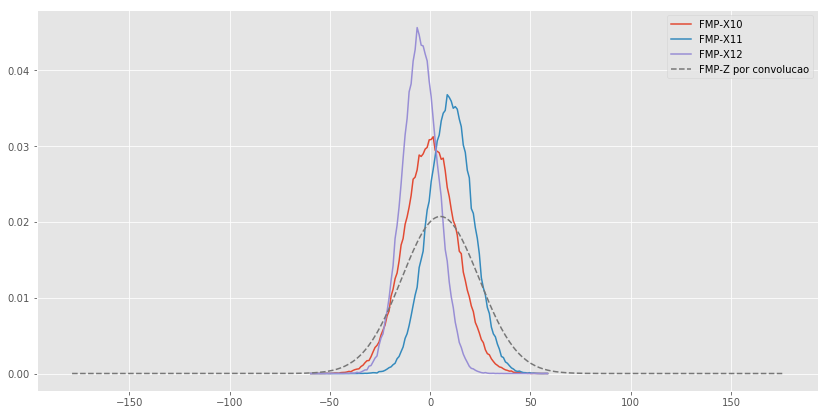

In [12]:
namostras = 100000
bins_edges = np.arange(-60, 60, 1)

# VAD 10
mu_X10, sigma_X10 = 0, 13 # média e desvio padrão
X10 = np.random.normal(mu_X10, sigma_X10, namostras)
hist_X10, edges_X10 = np.histogram(X10, bins=bins_edges, density=True)
S_X10 = (edges_X10[:-1] + edges_X10[1:])/2. # usa-se o centro de cada bin como abscissa

# VAD 11
mu_X11, sigma_X11 = 10, 11 # média e desvio padrão
X11 = np.random.normal(mu_X11, sigma_X11, namostras)
hist_X11, edges_X11 = np.histogram(X11, bins=bins_edges, density=True)
S_X11 = (edges_X11[:-1] + edges_X11[1:])/2.

# VAD 12
mu_X12, sigma_X12 = -5, 9 # média e desvio padrão
X12 = np.random.normal(mu_X12, sigma_X12, namostras)
hist_X12, edges_X12 = np.histogram(X12, bins=bins_edges, density=True)
S_X12 = (edges_X12[:-1] + edges_X12[1:])/2.

# Construção dos elementos X_i, FMP_i para usar na lista de input
VAD10 = np.array([S_X10, hist_X10]).T
VAD11 = np.array([S_X11, hist_X11]).T
VAD12 = np.array([S_X12, hist_X12]).T

t1 = time.time()

Z_PZ = somaVADs_conv([VAD10, VAD11, VAD12]) # Soma das VADs

t2 = time.time()
print "Tempo de execução da soma: %.5f seg\n" % (t2-t1)

# Plot
fig1 = plt.figure(figsize=(14,7))
ax1 = fig1.add_subplot(111)
ax1.plot(VAD10[:,0], VAD10[:,1], label='FMP-X10')
ax1.plot(VAD11[:,0], VAD11[:,1], label='FMP-X11')
ax1.plot(VAD12[:,0], VAD12[:,1], label='FMP-X12')
ax1.plot(Z_PZ[:,0], Z_PZ[:,1], '--', label='FMP-Z por convolucao')
ax1.legend()
plt.show()

O que foi feito utiliza as **funções de massa de probabilidade** individuais para obter a FMP da soma das VAD's, mas se tivermos acesso às amostras (como é o caso neste exemplo) também podemos **fazer diretamente a sua soma** (com seleção **aleatória**) e chegar ao conjunto de amostras da VAD da soma para depois obter o histograma (e FMP) desta.

Mean(X10)+Mean(X11)+Mean(X12)   =  5.09056061754
Mean(Z_amostras)                =  5.09056061754

Var(X10)+Var(X11)+Var(X12) =  370.19343654
Var(Z_amostras)            =  367.572846124


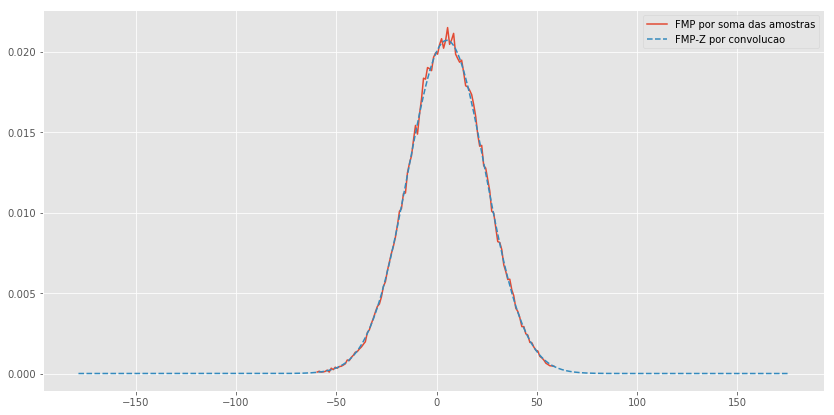

In [13]:
# Cada uma das variáveis, X10, X11, X12 é um vetor com 100000 amostras obtidas com amostragem
#  aleatória a partir das respetivas funções de probabilidade, portanto obtemos amostras aleatórias
#  de Z somando os elementos destes vetores (na mesma ordem).
Z_amostras = X10 + X11 + X12

print "Mean(X10)+Mean(X11)+Mean(X12)   = ", X10.mean()+X11.mean()+X12.mean()
print "Mean(Z_amostras)                = ", Z_amostras.mean()
print "\nVar(X10)+Var(X11)+Var(X12) = ", X10.var()+X11.var()+X12.var()
print "Var(Z_amostras)            = ", Z_amostras.var()

# Histograma com as amostras de Z_amostras
hist_Z_amostras, edges_Z_amostras = np.histogram(Z_amostras, bins=bins_edges, density=True)
S_Z_amostras = (edges_Z_amostras[:-1] + edges_Z_amostras[1:])/2.

# Plot
fig2 = plt.figure(figsize=(14,7))
ax2 = fig2.add_subplot(111)
ax2.plot(S_Z_amostras, hist_Z_amostras, label='FMP por soma das amostras')
ax2.plot(Z_PZ[:,0], Z_PZ[:,1], '--', label='FMP-Z por convolucao')
ax2.legend()
plt.show()

Obter a FMP desta forma é muito mais simples e direto, mas depende da técnica de amostragem e da semente aleatória utilizadas.

O gráfico abaixo pretende apenas ilustrar que se ordenarmos os vetores das amostras de cada VAD antes de os somar obtemos uma FMP diferente para Z, ou seja, deve ter-se o cuidado de garantir que a amostragem é aleatória.

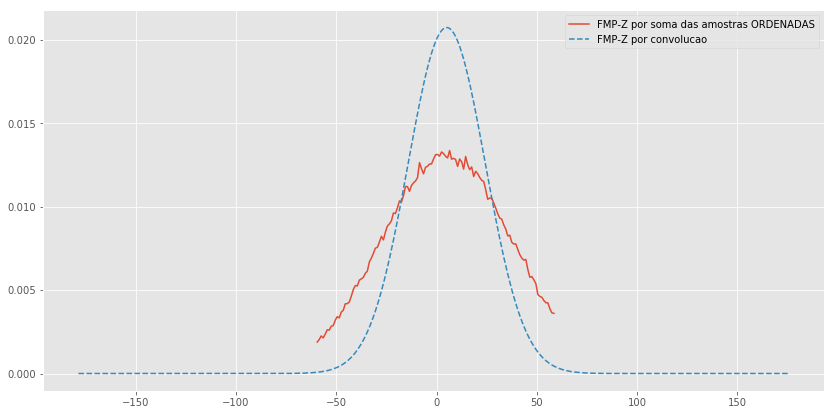

In [14]:
# Soma dos vetores de amostras aleatórias depois de ordenados
Z_amostras_b = np.sort(X10) + np.sort(X11) + np.sort(X12)

# Histograma com as amostras de Z_amostras
hist_Z_amostras_b, edges_Z_amostras_b = np.histogram(Z_amostras_b, bins=bins_edges, density=True)
S_Z_amostras_b = (edges_Z_amostras_b[:-1] + edges_Z_amostras_b[1:])/2.

# Plot
fig3 = plt.figure(figsize=(14,7))
ax3 = fig3.add_subplot(111)
ax3.plot(S_Z_amostras_b, hist_Z_amostras_b, label='FMP-Z por soma das amostras ORDENADAS')
ax3.plot(Z_PZ[:,0], Z_PZ[:,1], '--', label='FMP-Z por convolucao')
ax3.legend()
plt.show()

## Scripts otimizados

No módulo **somaVADs.py** encontram-se também dois outros métodos para obter a FMP da soma de VADs a partir das FMPs individuais: **somaVADs_FFT** e **somaVADs_hib**. Estes scripts procuram otimizar o método 2 e simplificar o input de várias FMPs iguais (bastando introduzir uma só vez a VAD a somar, seguida do número $n$ de vezes que será somada).

- **somaVADs_FFT** faz todas as convoluções necessárias no domínio das frequências, utilizando FFT;
- **somaVADs_hib** é um método híbrido que faz primeiro a convolução de todas as FMPs iguais passando ao domínio das frequências (FFT), calculando a potência $n$ da transformada, e obtendo a Transformada de Fourier inversa; depois prossegue fazendo convolução simples (método 2) com todas as FMPs diferentes assim encontradas.

In [15]:
from fmp_soma_vadis import somaVADs_FFT, somaVADs_hib

### Exemplo 5

Resolvem-se do novo as somas feitas no *Exemplo 4* com *somaVADs_biv*, *somaVADs_conv*, *somaVADs_FFT* e *somaVADs_hib* para comprovar resultados iguais.

In [16]:
# FMPs do Exemplo 4
res_ex2_biv   = somaVADs_biv([VAD10, VAD11, VAD12])
res_ex2_conv  = somaVADs_conv([VAD10, VAD11, VAD12])
res_ex2_FFT   = somaVADs_FFT([(VAD10,1), (VAD11,1), (VAD12,1)])
res_ex2_hib   = somaVADs_hib([(VAD10,1), (VAD11,1), (VAD12,1)])

eq1 = np.allclose(res_ex2_biv, res_ex2_conv)
eq2 = np.allclose(res_ex2_biv, res_ex2_FFT)
eq3 = np.allclose(res_ex2_biv, res_ex2_hib)

print "Todos iguais ao obtido no Ex.4? ", all([eq1, eq2, eq3])

Todos iguais ao obtido no Ex.4?  True


### Exemplo 6 - Testes ao tempo de execução de cada rotina

**Teste 1**

In [17]:
# Usam-se as VADs definidas no Exemplo 4: VAD10, VAD11 e VAD12
t1 = time.time()
resultado_1 = somaVADs_biv([VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,
                            VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,
                            VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,
                            VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,
                            VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,
                            VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12])
t2 = time.time()
resultado_2 = somaVADs_conv([VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,VAD10,
                             VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,
                             VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,VAD11,
                             VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,
                             VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,
                             VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12,VAD12])
t3 = time.time()
resultado_3 = somaVADs_FFT([(VAD10,10), (VAD11,20), (VAD12,30)])
t4 = time.time()
resultado_4 = somaVADs_hib([(VAD10,10), (VAD11,20), (VAD12,30)])
t5 = time.time()

eq1 = np.allclose(resultado_1, resultado_2)
eq2 = np.allclose(resultado_1, resultado_3)
eq3 = np.allclose(resultado_1, resultado_4)

print "Todos os resultados iguais? ", all([eq1, eq2, eq3])
print "Tempo somaVADs_biv   : ", t2-t1
print "Tempo somaVADs_conv  : ", t3-t2
print "Tempo somaVADs_FFT   : ", t4-t3
print "Tempo somaVADs_hib   : ", t5-t4

Todos os resultados iguais?  True
Tempo somaVADs_biv   :  117.848539114
Tempo somaVADs_conv  :  0.0170018672943
Tempo somaVADs_FFT   :  0.00692415237427
Tempo somaVADs_hib   :  0.055517911911


**Teste 2**

In [18]:
# Usam-se as VADs definidas no Exemplo 1: VAD1b e VAD2b, e no Exemplo 4: VAD10, VAD11 e VAD12
t1 = time.time()
resultado_1 = somaVADs_FFT([(VAD10,330),(VAD11,190),(VAD12,260),(VAD1b,244),(VAD2b,133)])
t2 = time.time()
resultado_2 = somaVADs_hib([(VAD10,330),(VAD11,190),(VAD12,260),(VAD1b,244),(VAD2b,133)])
t3 = time.time()

print "Todos os resultados iguais? ", np.allclose(resultado_1, resultado_2)
print "Tempo somaVADs_FFT    : ", t2-t1
print "Tempo somaVADs_hib    : ", t3-t2

Todos os resultados iguais?  True
Tempo somaVADs_FFT    :  191.682638884
Tempo somaVADs_hib    :  1.77627897263
